In [1]:
from core.utils_data import getCleanKIRC
from core.utils_analysis import *
from tqdm import tqdm

pathgraphomic_fusion
./data/TCGA_GBMLGG/splits/gbmlgg15cv_all_st_patches_512_1_0_1_rnaseq.pkl
pathgraphomic_fusion
./data/TCGA_GBMLGG/splits/gbmlgg15cv_all_st_patches_512_1_0_1_rnaseq.pkl


### CCRCC Survival Outcome Prediction

In [2]:
trainCox_KIRC(model='cox_agegender', normalize=False)

C-Indices across Splits [0.6495454545454545, 0.6208151382823872, 0.6713520749665328, 0.630187144019528, 0.6374269005847953, 0.6758957654723127, 0.6052254831782391, 0.6151202749140894, 0.6726872246696035, 0.5538047655649501, 0.551, 0.5817341862117982, 0.6406829992576095, 0.6541193181818182, 0.6908366533864542]
Average C-Index: 0.6300 ± 0.024
Average P-Value: 0.08402941642069009


In [3]:
trainCox_KIRC(model='cox_all', normalize=False)

C-Indices across Splits [0.7277272727272728, 0.7318049490538574, 0.8048862115127176, 0.7339300244100895, 0.6933479532163743, 0.7039087947882736, 0.7827487473156765, 0.8213058419243986, 0.6770925110132159, 0.6821675634127594, 0.5776666666666667, 0.6677327647476902, 0.7717149220489977, 0.6732954545454546, 0.7115537848605578]
Average C-Index: 0.7174 ± 0.034
Average P-Value: 0.033767264760414126


In [4]:
trainCox_KIRC(model='cox_grade', normalize=False)

C-Indices across Splits [0.6509090909090909, 0.6655749636098981, 0.7275769745649264, 0.6965012205044752, 0.66703216374269, 0.6605863192182411, 0.772369362920544, 0.8071305841924399, 0.6026431718061674, 0.6468101460415066, 0.554, 0.6552949538024165, 0.7494432071269488, 0.6278409090909091, 0.6478087649402391]
Average C-Index: 0.6754 ± 0.036
Average P-Value: 0.1867058942080268


In [2]:
models = ['cox_agegender', 'cox_grade',
          'omic', 'omicomic_fusion', 
          'graph', 'graphgraph_fusion', 
          'path', 'pathpath_fusion', 
          'pathomic_fusion', 'graphomic_fusion', 'pathgraphomic_fusion']
model_names = ['Cox (Age+Gender)', 'Cox (Grade)',
               'Genomic SNN', 'Genomic (SNN + SNN)',
               'Histology GCN', 'Histology (GCN + GCN)',
               'Histology CNN', 'Histology (CNN + CNN)',
               'Pathomic F. (CNN+SNN)', 'Pathomic F. (GCN+SNN)', 'Pathomic F. (CNN+GCN+SNN)']

In [3]:
ckpt_name = './checkpoints/TCGA_KIRC/surv_15/'
pvalue_surv_multi = [np.array(getPValAggSurv_KIRC_Multi(ckpt_name=ckpt_name, model=model, percentile=[25, 50, 75])) for model in tqdm(models)]
pvalue_surv_multi = pd.DataFrame(np.array(pvalue_surv_multi))
pvalue_surv_binary = [np.array(getPValAggSurv_KIRC_Binary(ckpt_name=ckpt_name, model=model, percentile=[50])) for model in tqdm(models)]
pvalue_surv_binary = pd.DataFrame(np.array(pvalue_surv_binary))
pvalue_surv = pd.concat([pvalue_surv_binary, pvalue_surv_multi],axis=1)
pvalue_surv.index = model_names
pvalue_surv.columns = ['P-Value (<50% vs. >50%)', 'P-Value (<25% vs. 25-50%)', 'P-Value (25-50% vs. 50-75%)', 'P-Value (50-75% vs. >75%)']

cv_surv = [np.array(getPredAggSurv_KIRC(ckpt_name=ckpt_name, model=model)) for model in tqdm(models)]
cv_surv = pd.DataFrame(np.array(cv_surv))
cv_surv.columns = ['Split %s' % str(k) for k in range(1,16)]
cv_surv.index = model_names
cv_surv['C-Index'] = [CI_pm(cv_surv.loc[model]) for model in model_names]
cv_surv_all = cv_surv[['C-Index']].join(pvalue_surv, how='inner')

100%|██████████| 11/11 [00:02<00:00,  5.03it/s]


In [4]:
cv_surv

,Split 1,Split 2,Split 3,Split 4,Split 5,Split 6,Split 7,Split 8,Split 9,Split 10,Split 11,Split 12,Split 13,Split 14,Split 15,C-Index
Cox (Age+Gender),0.649545,0.620815,0.671352,0.630187,0.637427,0.675896,0.605225,0.615120,0.672687,0.553805,0.551000,0.581734,0.640683,0.654119,0.690837,0.6300 ± 0.024
Cox (Grade),0.650909,0.665575,0.727577,0.696501,0.667032,0.660586,0.772369,0.807131,0.602643,0.646810,0.554000,0.655295,0.749443,0.627841,0.647809,0.6754 ± 0.036
Genomic SNN,0.713636,0.651383,0.591365,0.665175,0.709064,0.740391,0.667502,0.737543,0.623789,0.662952,0.649667,0.733475,0.744618,0.654119,0.696813,0.6828 ± 0.026
Genomic (SNN + SNN),0.699091,0.641921,0.576640,0.667616,0.716374,0.733550,0.690766,0.736684,0.620705,0.664105,0.644000,0.750533,0.733853,0.659801,0.694422,0.6820 ± 0.027
Histology GCN,0.706364,0.604803,0.623159,0.607811,0.728801,0.577199,0.614889,0.687285,0.664317,0.631822,0.590667,0.736318,0.648107,0.569602,0.613546,0.6403 ± 0.030
Histology (GCN + GCN),0.679091,0.599709,0.634538,0.599675,0.752924,0.566775,0.629205,0.660653,0.664317,0.624135,0.597333,0.746979,0.659243,0.558949,0.599203,0.6382 ± 0.032
Histology CNN,0.737273,0.674672,0.640562,0.620830,0.685673,0.630619,0.630637,0.654639,0.716300,0.623367,0.688667,0.712154,0.669636,0.618608,0.639044,0.6628 ± 0.021
Histology (CNN + CNN),0.713636,0.689229,0.653949,0.682669,0.679825,0.702280,0.609878,0.768041,0.680176,0.681015,0.639333,0.671642,0.638456,0.598722,0.650199,0.6706 ± 0.023
Pathomic F. (CNN+SNN),0.787727,0.679767,0.659973,0.733930,0.735015,0.749837,0.645669,0.791237,0.677533,0.732513,0.677000,0.760483,0.755754,0.657670,0.736255,0.7187 ± 0.027
Pathomic F. (GCN+SNN),0.715909,0.635735,0.617135,0.666802,0.716740,0.732899,0.697208,0.748282,0.622026,0.669869,0.651667,0.747690,0.748330,0.659446,0.696016,0.6884 ± 0.025


In [5]:
cv_surv_all

,C-Index,P-Value (<50% vs. >50%),P-Value (<25% vs. 25-50%),P-Value (25-50% vs. 50-75%),P-Value (50-75% vs. >75%)
Cox (Age+Gender),0.6300 ± 0.024,1.268123e-16,1.081791e-01,0.000012,3.595540e-01
Cox (Grade),0.6754 ± 0.036,4.418806e-17,1.249698e-07,0.000452,5.130931e-01
Genomic SNN,0.6828 ± 0.026,4.978762e-19,3.279724e-01,0.006050,2.595847e-16
Genomic (SNN + SNN),0.6820 ± 0.027,1.063645e-21,2.289080e-01,0.001299,4.330912e-16
Histology GCN,0.6403 ± 0.030,8.577003e-07,2.332652e-01,0.191461,1.522374e-03
Histology (GCN + GCN),0.6382 ± 0.032,1.307624e-04,8.844667e-01,0.127972,1.398158e-02
Histology CNN,0.6628 ± 0.021,5.257247e-16,3.614152e-01,0.000002,2.243976e-03
Histology (CNN + CNN),0.6706 ± 0.023,1.660816e-14,1.065234e-01,0.001921,1.083638e-03
Pathomic F. (CNN+SNN),0.7187 ± 0.027,2.578648e-25,3.353718e-01,0.000761,4.469613e-14
Pathomic F. (GCN+SNN),0.6884 ± 0.025,5.549565e-20,2.865214e-01,0.001074,8.065721e-15


### Hazard Histograms

In [6]:
def getHazardHistogramPlot_KIRC(ckpt_name='./checkpoints/TCGA_KIRC/surv_15/', model='pathgraphomic_fusion', 
                           split='test', zscore=True, agg_type='Hazard_mean', c=[(-1.5, -0.75), (-0.75, 0), (0, 0.75), (0.75, 1.5)]):
    data = getDataAggSurv_KIRC(ckpt_name=ckpt_name, model=model, split=split, use_rnaseq=True, agg_type=agg_type, zscore=zscore)
    norm = True
    fig, ax = plt.subplots(dpi=600)

    low = data[data['OS_month'] <= 12*3.5]
    low = low[low['censored'] == 1]
    high = data[data['OS_month'] > 12*3.5]
    high = high[high['censored'] == 1]

    sns.distplot(low['Hazard'], bins=15, kde=False, norm_hist=norm,
                 #kde_kws={"color": "k", "lw": 2},
                 hist_kws={'histtype':'stepfilled', "linewidth": 1, "alpha": 0.5, "color": "r"}, ax=ax)
    sns.distplot(high['Hazard'], bins=15, kde=False, norm_hist=norm,
                 #kde_kws={"color": "k", "lw": 2},
                 hist_kws={'histtype':'stepfilled', "linewidth": 1, "alpha": 0.5, "color": "b"}, ax=ax)

    ax.set_xlabel('')
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.tick_params(axis='y', which='both', labelsize=15)
    ax.tick_params(axis='x', which='both', labelsize=15)
    ax.set_xticks(np.arange(-1.5, 1.51, 0.5))
    plt.xlim([-1.75, 1.75])
    if norm:
        ax.set_yticks(np.arange(0, 2.1, 1))
        plt.ylim([0, 2])

    fig.savefig(ckpt_name+'/%s_HHP.png' % (model))
    
    clusters = []
    for i in range(len(c)):
        cluster = data[data['Hazard'] > c[i][0]]
        cluster = cluster[cluster['Hazard'] < c[i][1]]
        cluster_size = cluster.shape[0]
        cluster_I = (cluster['Neoplasm Histologic Grade'] == '1').sum() / cluster_size
        cluster_II = (cluster['Neoplasm Histologic Grade'] == '2').sum() / cluster_size
        cluster_III = (cluster['Neoplasm Histologic Grade'] == '3').sum() / cluster_size
        cluster_IV = (cluster['Neoplasm Histologic Grade'] == '4').sum() / cluster_size
        cluster_summary = [cluster_I, cluster_II, cluster_III, cluster_IV]
        clusters.append(cluster_summary)

    cluster_results = pd.DataFrame(clusters)
    cluster_results.index = ['%0.2f < Hazard < %0.2f' % c[i] for i in range(len(c))]
    cluster_results.index.name = 'Density Region'
    cluster_results.columns = ['Grade ' + str(g) + ' (%)' for g in range(1, 5)]
    cluster_results *= 100
    pd.options.display.float_format = '{:.2f}'.format
    return cluster_results

,Grade 1 (%),Grade 2 (%),Grade 3 (%),Grade 4 (%)
Density Region,,,,
-1.50 < Hazard < -0.75,4.51,53.47,36.46,5.56
-0.75 < Hazard < 0.00,4.53,44.19,40.51,10.76
0.00 < Hazard < 0.75,1.05,43.71,43.36,11.89
0.75 < Hazard < 1.50,3.26,27.17,45.65,23.91
-1.50 < Hazard < -0.75,5.44,58.16,30.96,5.44
-0.75 < Hazard < 0.00,2.26,46.77,39.68,11.29
0.00 < Hazard < 0.75,3.25,37.57,47.04,12.13
0.75 < Hazard < 1.50,1.54,29.74,46.67,22.05
-1.50 < Hazard < -0.75,3.82,52.29,38.36,5.53


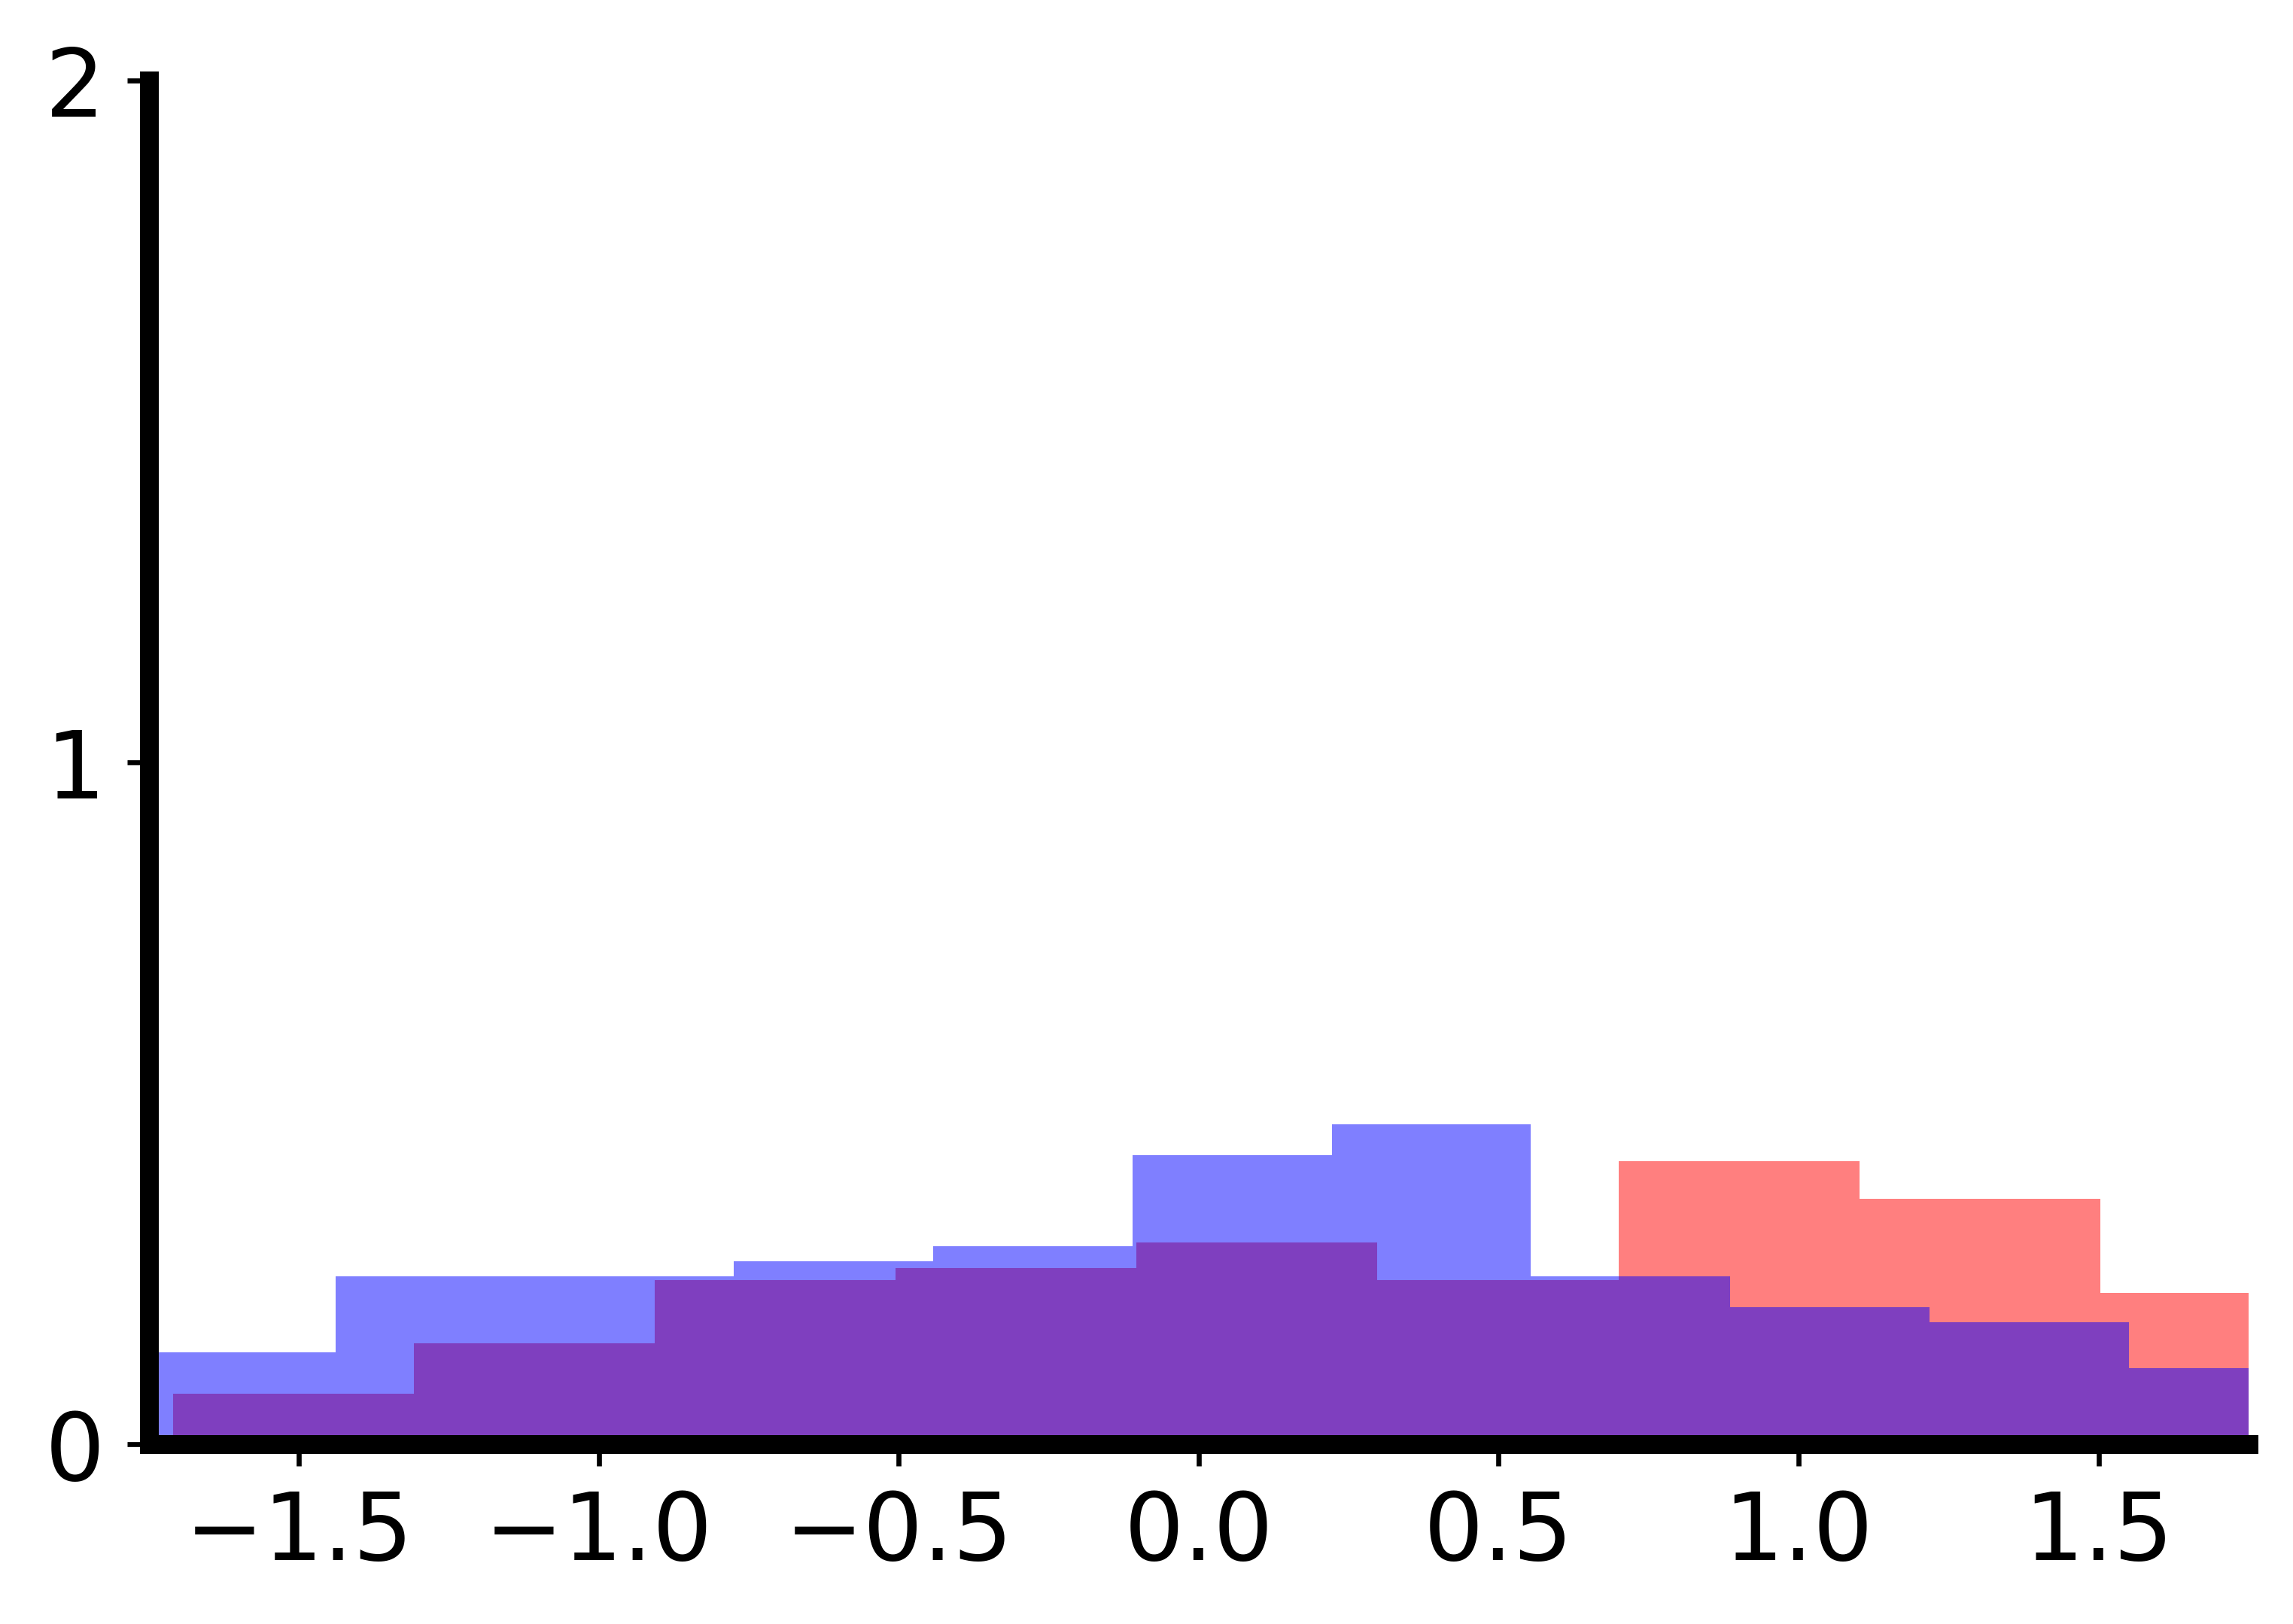

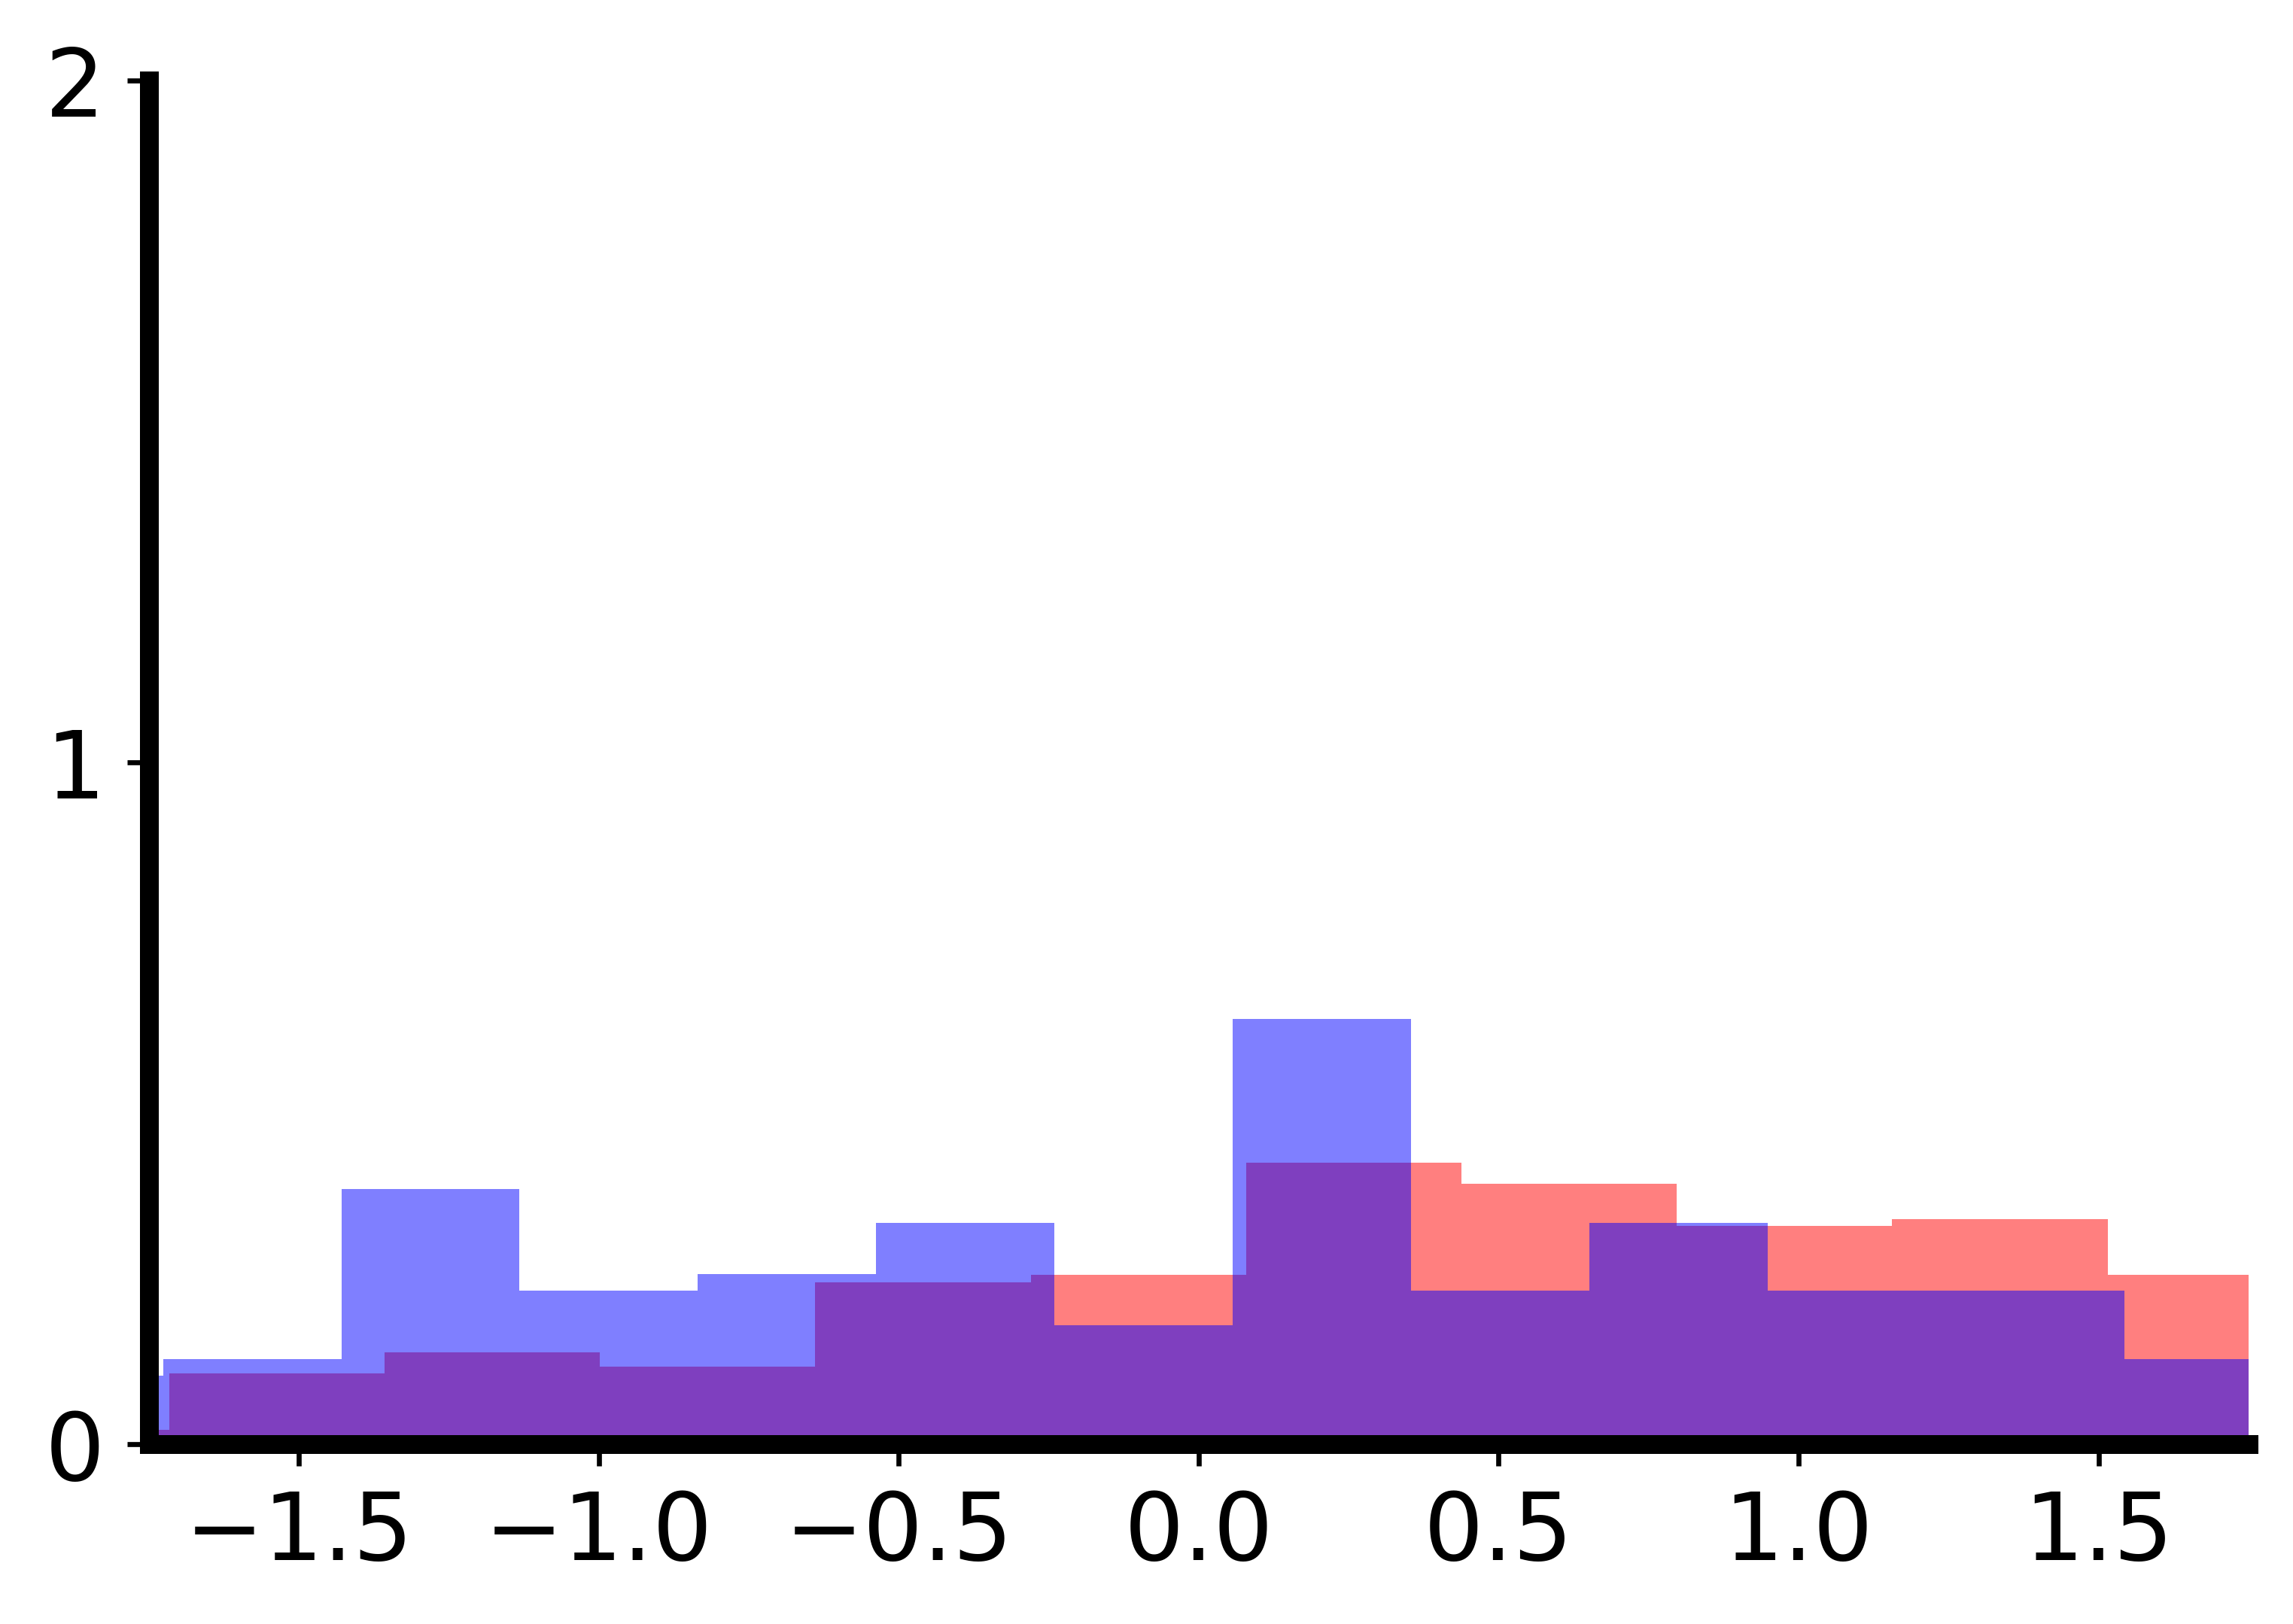

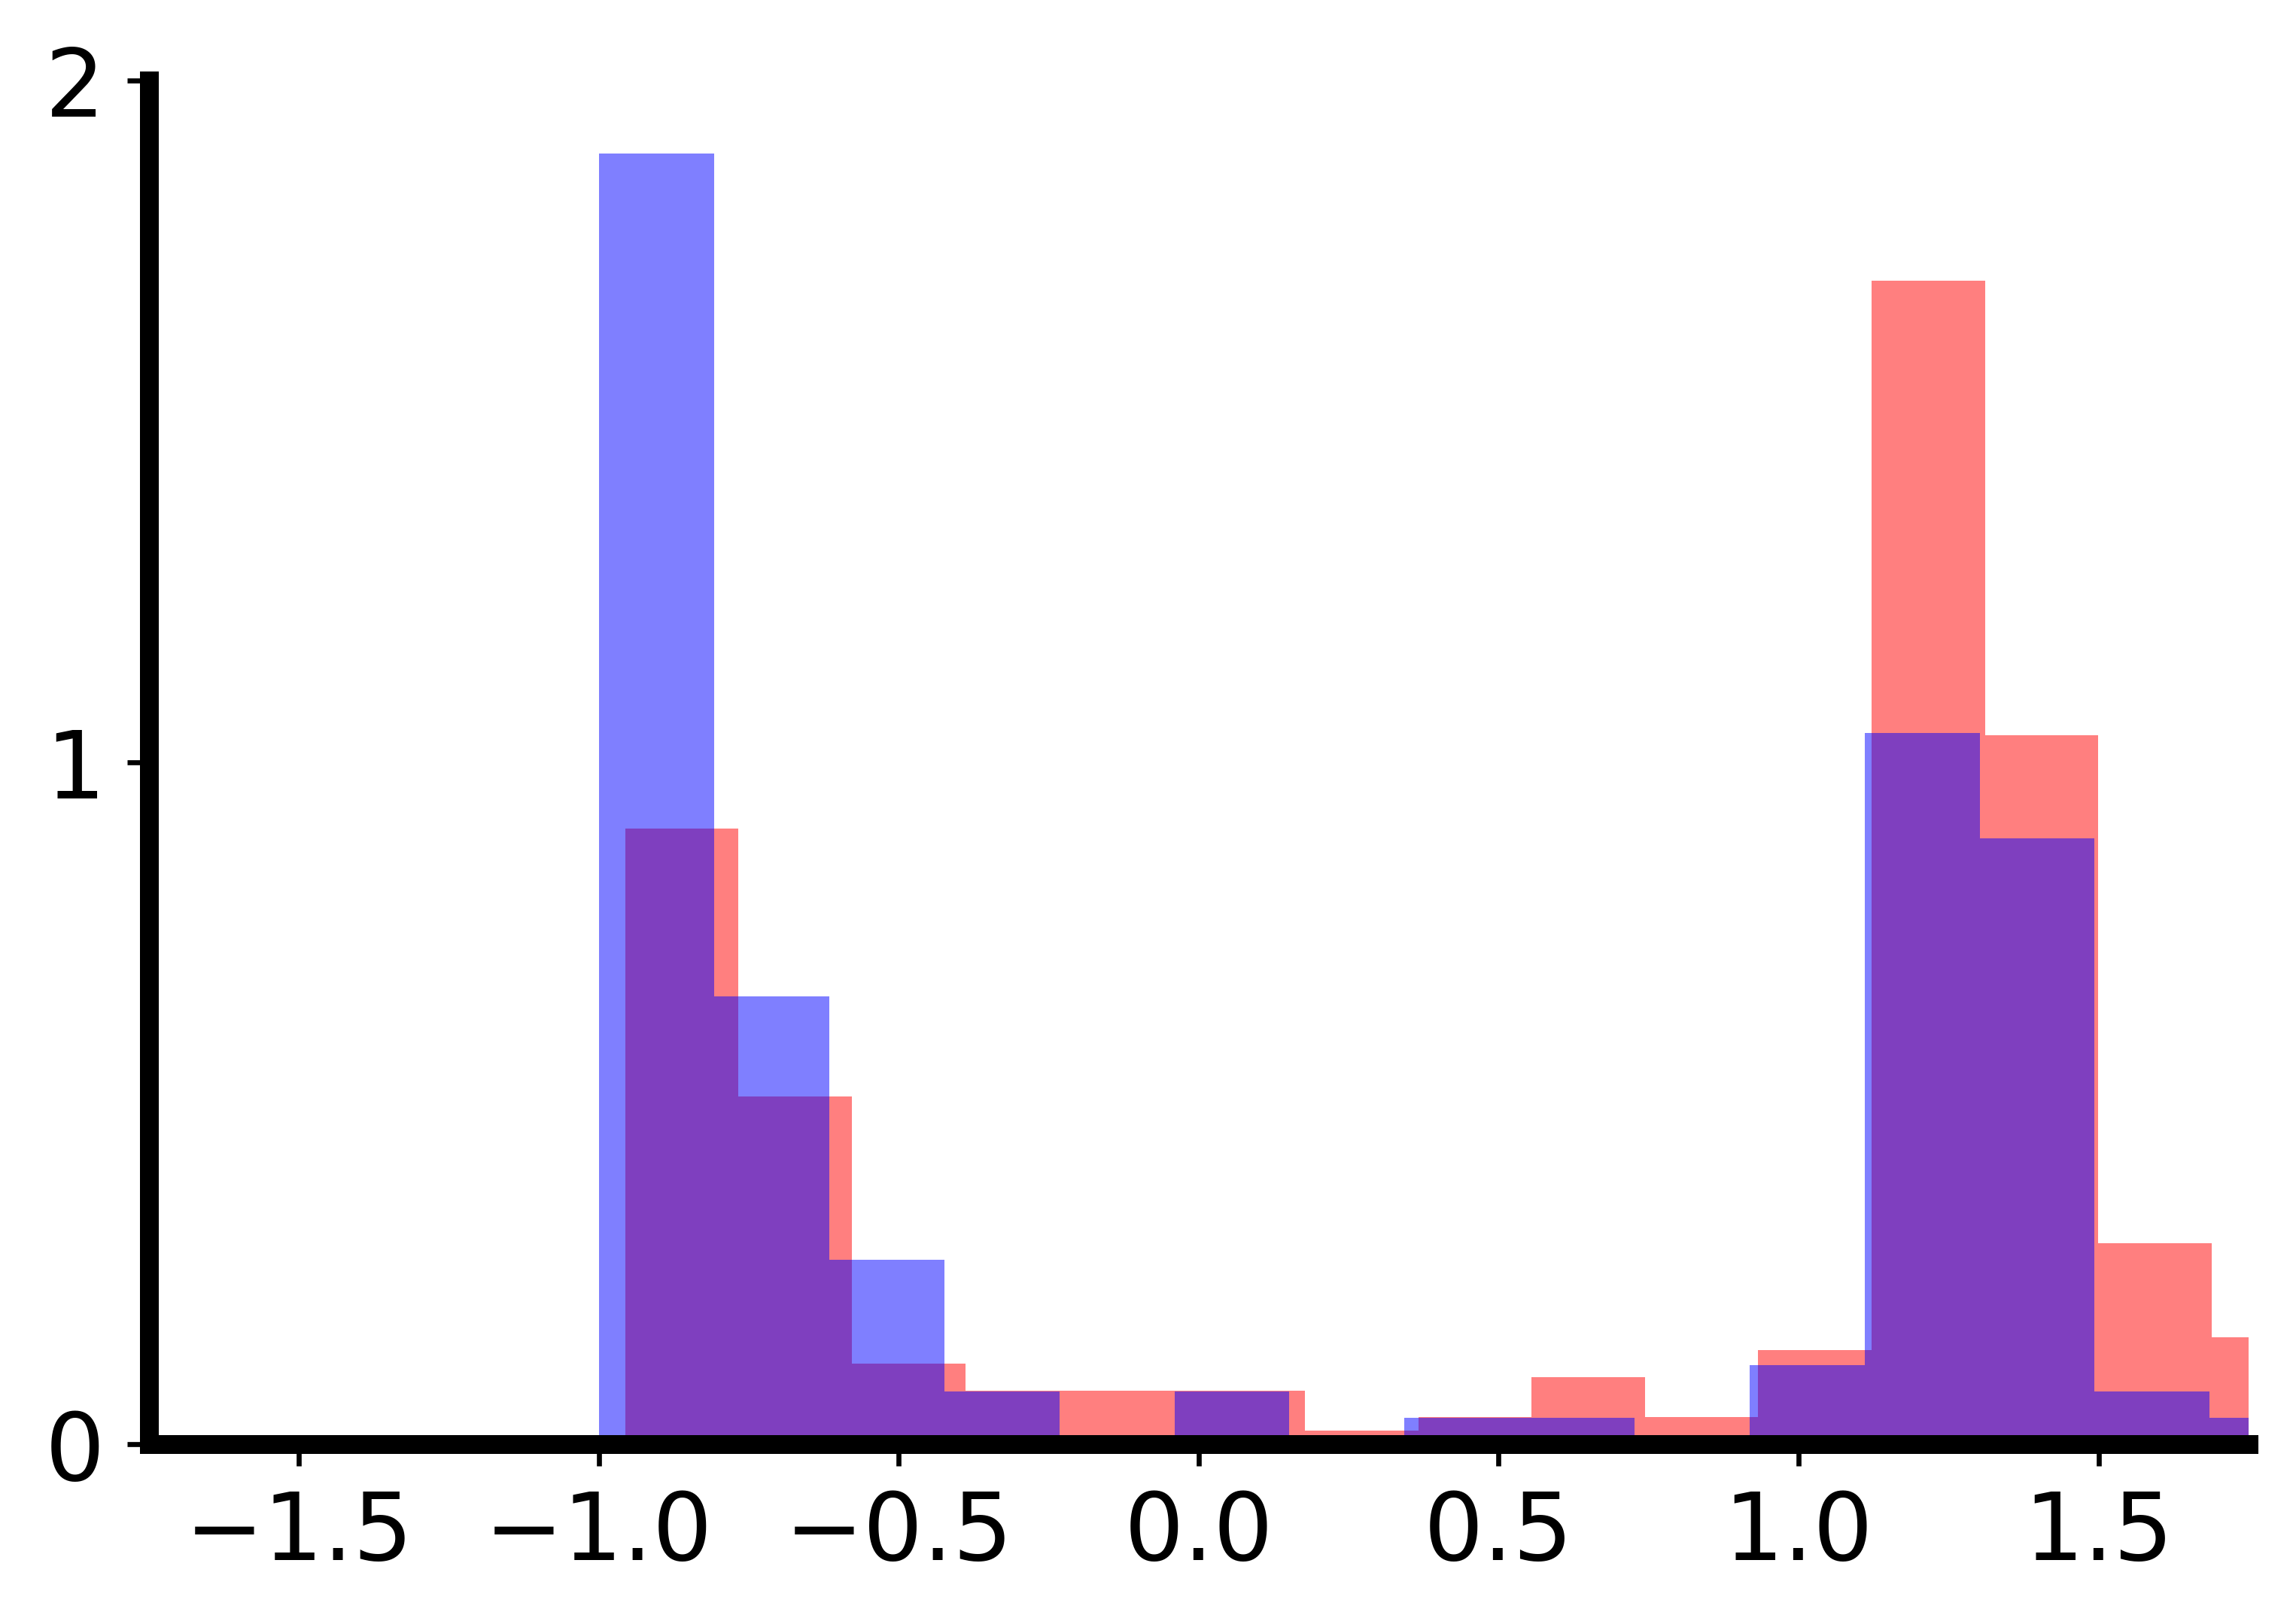

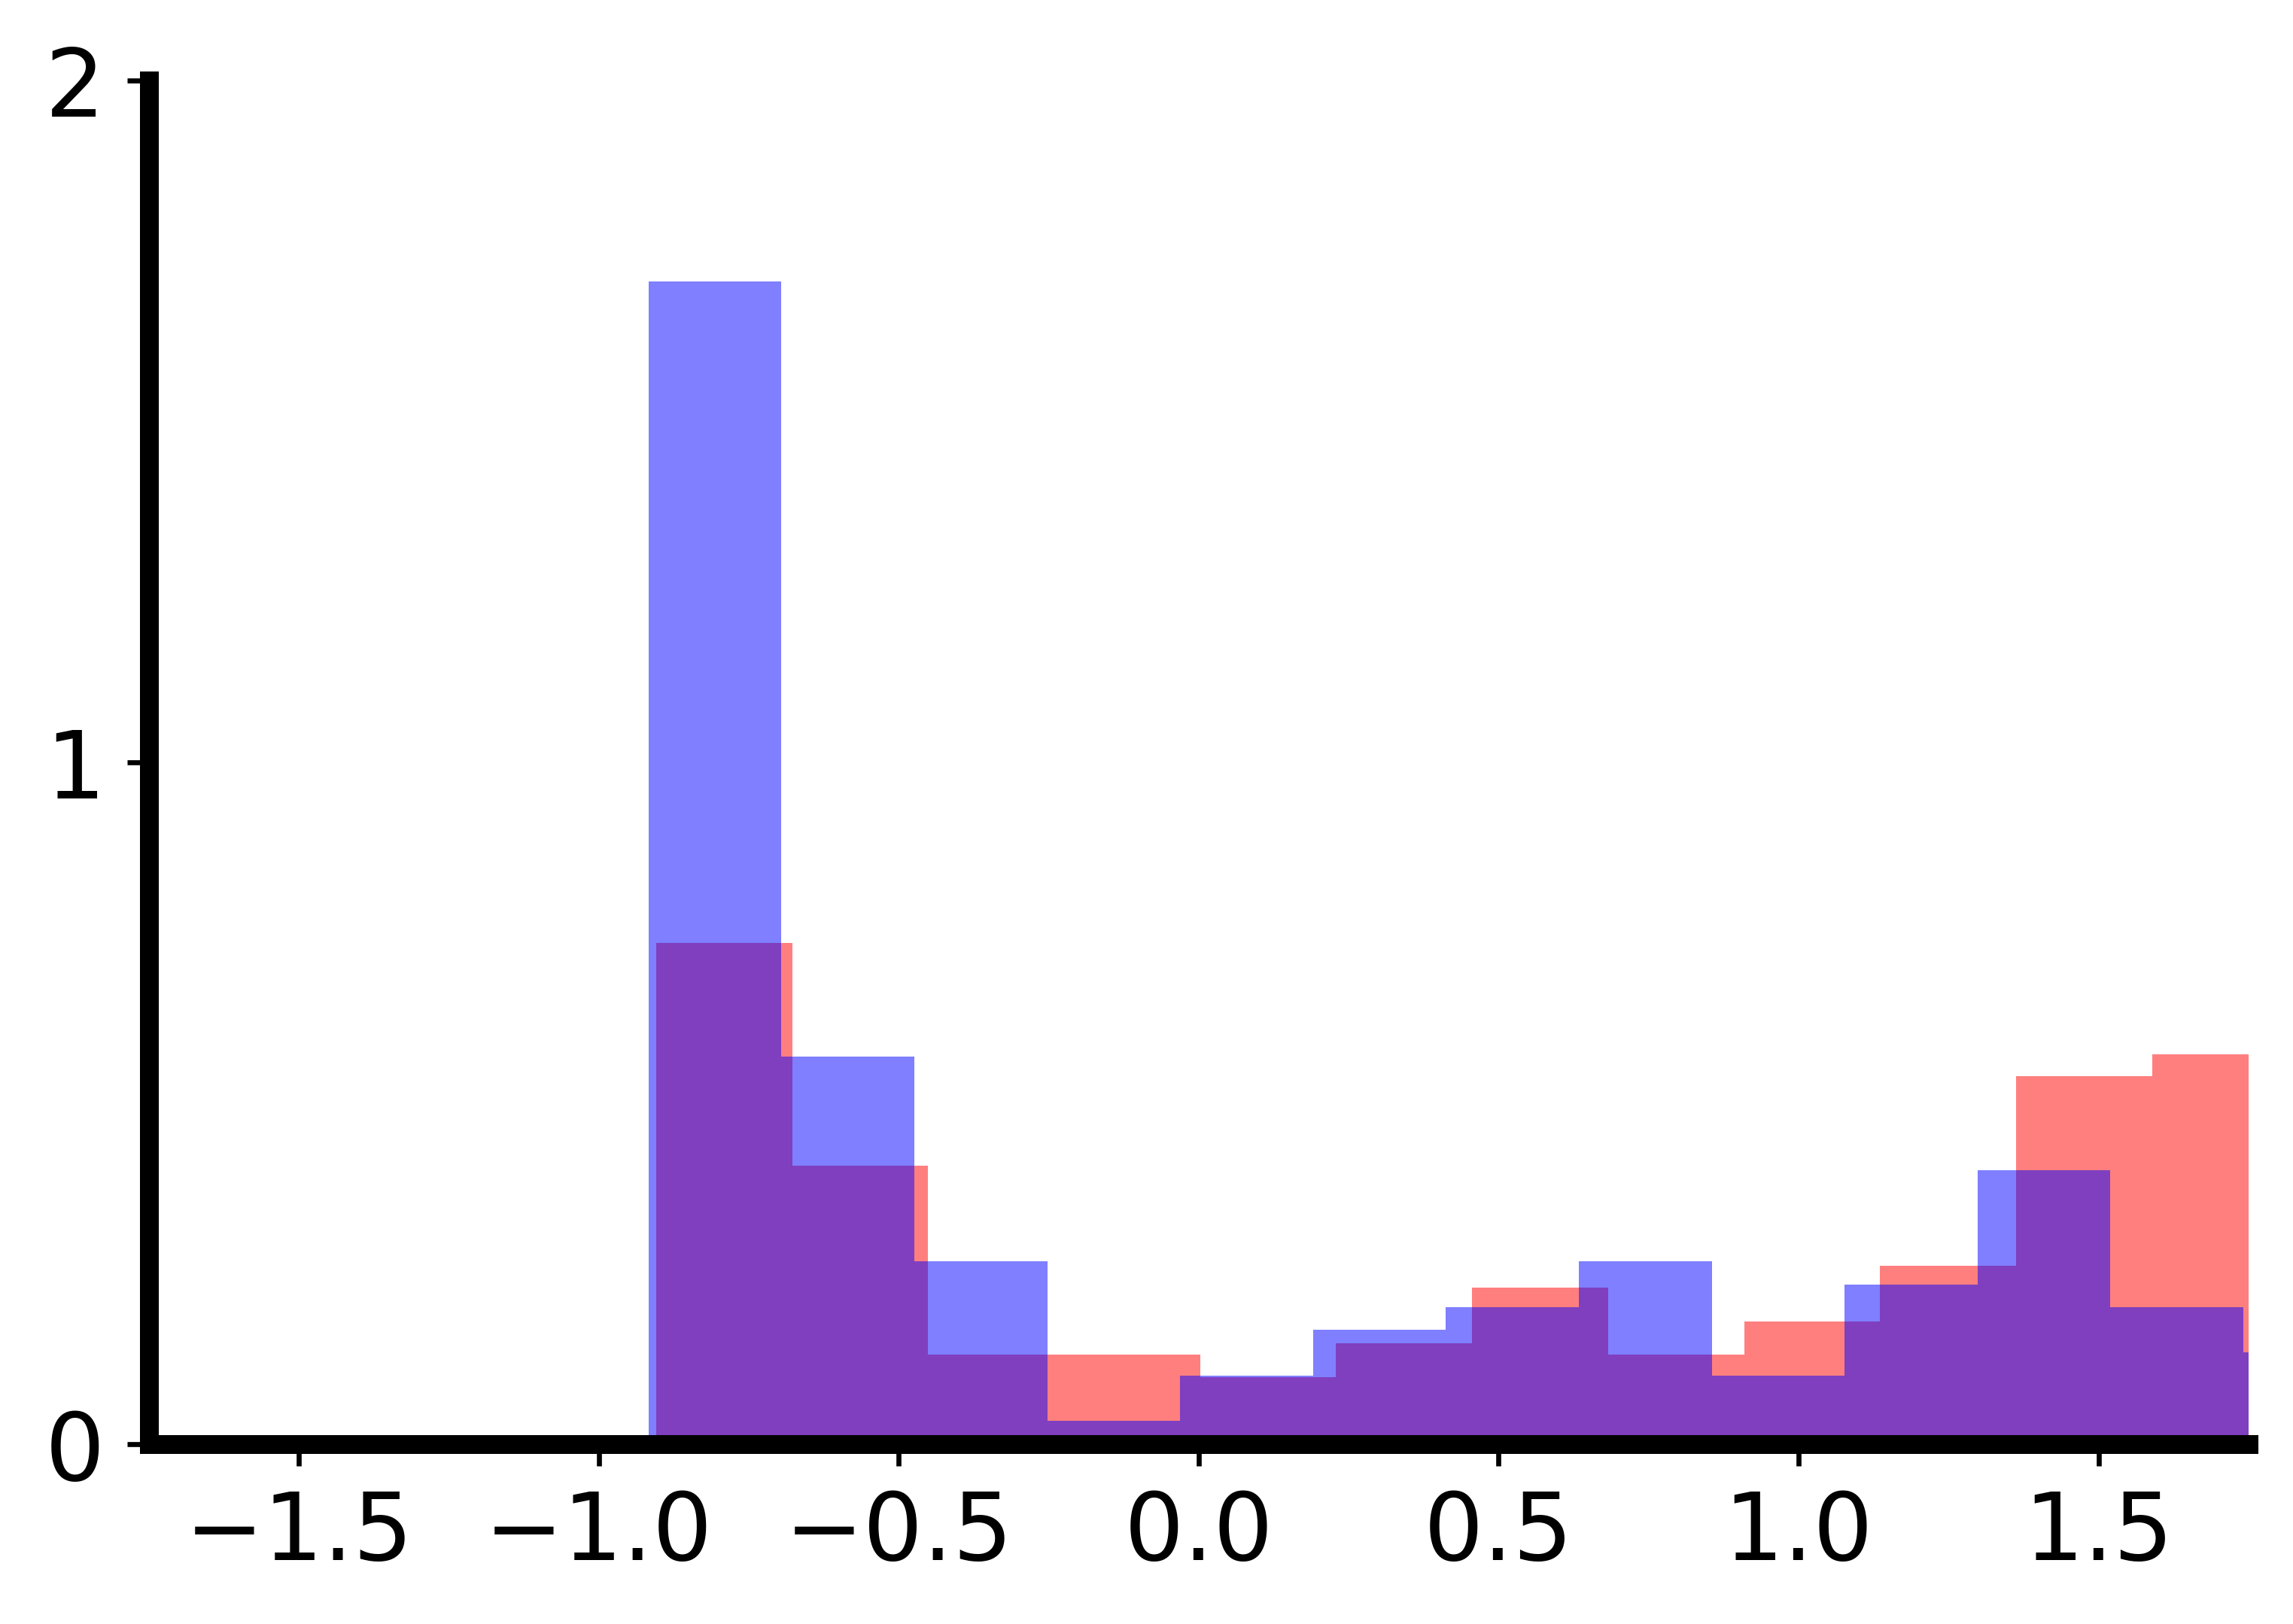

In [7]:
cluster_p = getHazardHistogramPlot_KIRC(model='path')
cluster_g = getHazardHistogramPlot_KIRC(model='graph')
cluster_o = getHazardHistogramPlot_KIRC(model='omic')
cluster_pgo = getHazardHistogramPlot_KIRC(model='pathgraphomic_fusion')
cluster_results = pd.concat([cluster_p, cluster_g, cluster_o, cluster_pgo])
cluster_results

In [8]:
for model in tqdm(['path', 'graph', 'omic', 'pathgraphomic_fusion']):
    makeKaplanMeierPlot_KIRC_Binary(model=model)
    makeKaplanMeierPlot_KIRC_Multi(model=model)

100%|██████████| 4/4 [00:11<00:00,  2.81s/it]
